In [1]:
import collections
import sys
import subprocess
import pandas as pd
import seaborn as sns
import os
import numpy as np
import uuid
import tempfile
import bnpy
import scikit_posthocs as sp
import itertools

from scipy.stats import kruskal, f_oneway
from scipy.stats import ttest_ind

sys.path.append('/opt/hydra/')

src = os.environ["HYDRA_SRC"]

import library.analysis as hy

import logging 

In [2]:
# This cmd was used to identify multimodal genes 
cmd = ["docker" ,
       "run",
       "-v", "$PWD:/data",
       "jpfeil/hydra@sha256:930436b5df08d88f2ba68483e0234dfb4ba639f40d6a725eb497422ffefb71de",
       "filter",
       "-e", "data/TARGET-osteo-minus-muscle.tsv",
       "--output-dir", "output",
       "--CPU", "15",
       "--min-mean-filter", "1.0"]

In [3]:
mm_genes = 'output/MultiModalGenes/'
exp_path = 'data/TARGET-osteo-minus-muscle.tsv'

In [4]:
exp = pd.read_csv(exp_path, sep='\t', index_col=0)

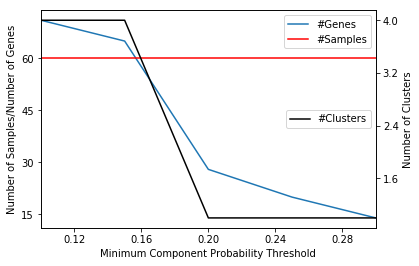

In [5]:
scan = hy.ScanEnrichmentAnalysis(exp_path=exp_path,
                                 mm_path=mm_genes,
                                 min_prob_range=[0.1, 0.15, 0.2, 0.25, 0.3],
                                 gmt_path='data/Human_GOBP_AllPathways_no_GO_iea_December_01_2018_entrezgene.gmt',
                                 K=5,
                                 CPU=7).scan()

In [6]:
scan

,num_genesets,gs_terms,gs_term_genes,num_genes,num_clusters,num_samples
min_prob_filter,,,,,,
0.10,26,NABA_SECRETED_FACTORS%MSigdb_C2%NABA_SECRETED_...,CHRNE|SLC6A2|HAND2|KCNE4|CRLF1|DES|TFF2|IGHG3|...,71,4,60
0.15,24,NABA_SECRETED_FACTORS%MSigdb_C2%NABA_SECRETED_...,SLC6A2|C15orf59|CHRNE|TFF2|IGHG3|CXCL11|C1QTNF...,65,4,60
0.20,4,NABA_SECRETED_FACTORS%MSigdb_C2%NABA_SECRETED_...,IGHG2|IGHG3|IGLC1|CCK|IGLC3|MUC15|TGFA|AMH|SER...,28,1,60
0.25,5,NABA_SECRETED_FACTORS%MSigdb_C2%NABA_SECRETED_...,TGFA|AMH|BMP5|SFRP1|HMSD|SERPINA5|PRL|CBLN4|IG...,20,1,60
0.30,2,NABA_MATRISOME_ASSOCIATED%MSigdb_C2%NABA_MATRI...,TGFA|BMP5|SFRP1|HMSD|SERPINA5|PRL|C1QTNF7|EGFL...,14,1,60


In [25]:
res = hy.EnrichmentAnalysis(exp_path=exp_path,
                            mm_path=mm_genes,
                            min_prob_filter=0.15,
                            min_effect_filter=1.0,
                            gmt_path='data/Human_GOBP_AllPathways_no_GO_iea_December_01_2018_entrezgene.gmt')

In [26]:
res.get_enriched_terms()

,Unnamed: 0,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count
0,NABA_SECRETED_FACTORS%MSigdb_C2%NABA_SECRETED_...,NABA_SECRETED_FACTORS%MSigdb_C2%NABA_SECRETED_...,NABA_SECRETED_FACTORS%MSigdb_C2%NABA_SECRETED_...,17/182,146/10841,3.187236e-10,7.690800e-07,7.102503e-07,SFRP1/CXCL11/CCL21/CHRDL2/CXCL13/PRL/CXCL9/CXC...,17
1,NABA_MATRISOME_ASSOCIATED%MSigdb_C2%NABA_MATRI...,NABA_MATRISOME_ASSOCIATED%MSigdb_C2%NABA_MATRI...,NABA_MATRISOME_ASSOCIATED%MSigdb_C2%NABA_MATRI...,25/182,358/10841,1.304826e-09,1.574273e-06,1.453851e-06,SFRP1/CXCL11/MUC15/CCL21/CHRDL2/CXCL13/PRL/CST...,25
2,PEPTIDE LIGAND-BINDING RECEPTORS%REACTOME%R-HS...,PEPTIDE LIGAND-BINDING RECEPTORS%REACTOME%R-HS...,PEPTIDE LIGAND-BINDING RECEPTORS%REACTOME%R-HS...,10/182,59/10841,4.280935e-08,3.443299e-05,3.179908e-05,CXCL11/CCL21/CXCL13/CXCL9/CXCL8/PENK/NMU/TAC3/...,10
3,CLASS A 1 (RHODOPSIN-LIKE RECEPTORS)%REACTOME ...,CLASS A 1 (RHODOPSIN-LIKE RECEPTORS)%REACTOME ...,CLASS A 1 (RHODOPSIN-LIKE RECEPTORS)%REACTOME ...,11/182,100/10841,8.543338e-07,4.590966e-04,4.239786e-04,CXCL11/CCL21/CXCL13/CXCL9/CXCL8/TSHR/PENK/NMU/...,11
4,CELL-CELL SIGNALING%GOBP%GO:0007267,CELL-CELL SIGNALING%GOBP%GO:0007267,CELL-CELL SIGNALING%GOBP%GO:0007267,22/182,401/10841,9.512983e-07,4.590966e-04,4.239786e-04,SCN4B/SFRP1/CXCL11/SNAP25/CCL21/APBA2/C15orf59...,22
5,REGULATION OF SYSTEM PROCESS%GOBP%GO:0044057,REGULATION OF SYSTEM PROCESS%GOBP%GO:0044057,REGULATION OF SYSTEM PROCESS%GOBP%GO:0044057,15/182,203/10841,1.569063e-06,6.310248e-04,5.827555e-04,SCN4B/KCNH2/HAND2/ATP1B2/HRC/SLN/CACNA1G/DSG2/...,15
6,GPCR LIGAND BINDING%REACTOME DATABASE ID RELEA...,GPCR LIGAND BINDING%REACTOME DATABASE ID RELEA...,GPCR LIGAND BINDING%REACTOME DATABASE ID RELEA...,12/182,145/10841,5.651570e-06,1.948177e-03,1.799154e-03,CXCL11/CCL21/CXCL13/CXCL9/CXCL8/IHH/TSHR/PENK/...,12
7,CHEMOKINE-MEDIATED SIGNALING PATHWAY%GOBP%GO:0...,CHEMOKINE-MEDIATED SIGNALING PATHWAY%GOBP%GO:0...,CHEMOKINE-MEDIATED SIGNALING PATHWAY%GOBP%GO:0...,6/182,31/10841,1.070711e-05,3.229531e-03,2.982493e-03,CXCL11/CCL21/CXCL13/CXCL9/CXCL8/TFF2,6
8,CHEMOKINE RECEPTORS BIND CHEMOKINES%REACTOME D...,CHEMOKINE RECEPTORS BIND CHEMOKINES%REACTOME D...,CHEMOKINE RECEPTORS BIND CHEMOKINES%REACTOME D...,5/182,20/10841,1.594820e-05,4.275888e-03,3.948810e-03,CXCL11/CCL21/CXCL13/CXCL9/CXCL8,5
9,ANTIMICROBIAL HUMORAL IMMUNE RESPONSE MEDIATED...,ANTIMICROBIAL HUMORAL IMMUNE RESPONSE MEDIATED...,ANTIMICROBIAL HUMORAL IMMUNE RESPONSE MEDIATED...,5/182,21/10841,2.064846e-05,4.982474e-03,4.601347e-03,CXCL11/CXCL13/GNLY/CXCL9/CXCL8,5


In [27]:
genes = res.get_enriched_term_genes()

len(genes)

65

In [28]:
clus = hy.MultivariateMixtureModel(data=exp.reindex(genes),
                                   center=True,
                                   gamma=5.0,
                                   variance=2.0,
                                   K=5, 
                                   verbose=True)

centering data


In [29]:
exp.reindex(genes).to_csv('model/training-data.tsv', sep='\t')

In [30]:
bnpy.ioutil.ModelWriter.save_model(clus.hmodel,
                                   'model',
                                   prefix='OsteoNoMuscle')

In [31]:
assignments = clus.get_assignments(exp.reindex(genes))

assign = pd.DataFrame(index=exp.columns,
                      columns=[1])

for sample, assignment in zip(exp.columns, assignments):
    assign.loc[sample, 1] = assignment + 1

In [32]:
hclust = hy.HClust(data=exp.reindex(genes))

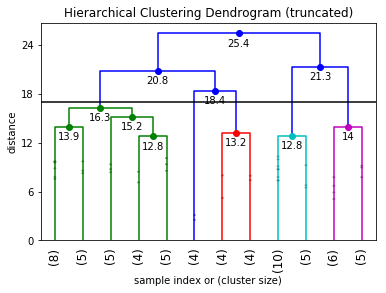

In [33]:
hclust.plot_row_linkage(17)
row_groups = hclust.get_row_groups(17)

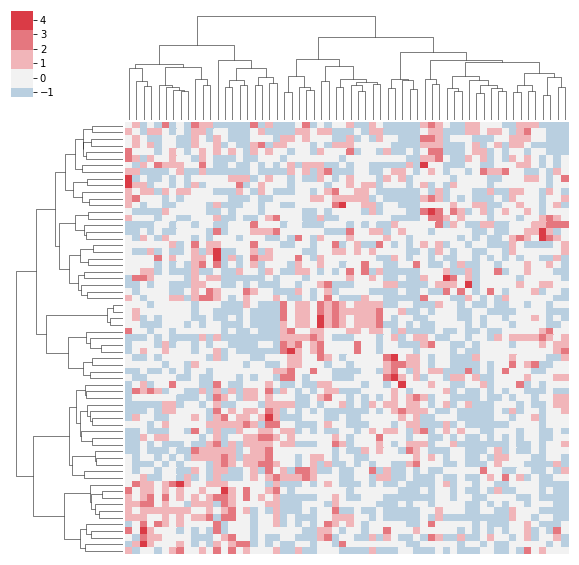

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

#col_order = assign.sort_values(1).index.values

g = sns.clustermap(exp.reindex(genes).dropna(),
                   z_score=0,
                   method='ward',
                   center=0,
                   cmap=sns.diverging_palette(240, 10, n=7),
                   figsize=(10, 10))

ax = g.ax_heatmap

ax.set_xticklabels([])
ax.set_xticks([])
ax.set_yticklabels([])
ax.set_yticks([])

pth = 'img/expression-heatmap.svg'
plt.savefig(pth, format='svg', bbox_inches='tight')

In [35]:
fgseas = {}
for cluster, rows in assign.groupby(1):
    ins = rows.index.values
    outs = [x for x in exp.columns if x not in ins]
    
    r = ttest_ind(exp[ins].values,
                  exp[outs].values,
                  axis=1).statistic
                    
    tstats = pd.DataFrame(index=exp.index, 
                          data=r).dropna()
                          
    tstats = tstats.sort_values(0, ascending=False)
    
    fgseas[cluster] = hy.n1(tstats)

In [36]:
t = fgseas[1]

t[(t['padj'] < 0.05) & (t['ES'] > 0)].sort_values('NES', ascending=False)

,pval,padj,ES,NES,nMoreExtreme,size,leadingEdge
pathway,,,,,,,
HALLMARK_EPITHELIAL_MESENCHYMAL_TRANSITION%MSIGDB_C2%HALLMARK_EPITHELIAL_MESENCHYMAL_TRANSITION,0.000081,0.004712,0.541183,3.651242,0,184,TAGLN|ECM2|EDIL3|LUM|MYLK|COL3A1|COL1A1|MMP14|...
HALLMARK_INTERFERON_GAMMA_RESPONSE%MSIGDB_C2%HALLMARK_INTERFERON_GAMMA_RESPONSE,0.000081,0.004712,0.514101,3.472806,0,185,NFKB1|CFB|C1R|BANK1|TXNIP|MX2|APOL6|C1S|TRIM25...
HALLMARK_INTERFERON_ALPHA_RESPONSE%MSIGDB_C2%HALLMARK_INTERFERON_ALPHA_RESPONSE,0.000087,0.004712,0.575203,3.441760,0,96,TMEM140|TXNIP|C1S|SAMD9|TRIM25|NMI|ISG20|IFI44...
HALLMARK_TNFA_SIGNALING_VIA_NFKB%MSIGDB_C2%HALLMARK_TNFA_SIGNALING_VIA_NFKB,0.000081,0.004712,0.452161,3.038550,0,180,STAT5A|NFKB1|KYNU|IL7R|MSC|RCAN1|FOSL2|GFPT2|K...
NABA_CORE_MATRISOME%MSIGDB_C2%NABA_CORE_MATRISOME,0.000081,0.004712,0.444609,2.991585,0,181,CRISPLD2|ECM2|EDIL3|LUM|COL3A1|COL1A1|NTN4|SPO...
HALLMARK_INFLAMMATORY_RESPONSE%MSIGDB_C2%HALLMARK_INFLAMMATORY_RESPONSE,0.000084,0.004712,0.458887,2.970938,0,146,NFKB1|P2RX7|IL7R|P2RX4|MMP14|NMI|HIF1A|PLAUR|H...
INTERLEUKIN-4 AND INTERLEUKIN-13 SIGNALING%REACTOME DATABASE ID RELEASE 66%6785807,0.000089,0.004712,0.518388,2.960469,0,78,S1PR1|HMOX1|MMP2|STAT3|HIF1A|VCAM1|IL13RA1|COL...
DEFENSE RESPONSE%GOBP%GO:0006952,0.000072,0.004712,0.377855,2.888795,0,472,GBP1|NFKB1|TLR4|MID1|CFB|APOL1|KYNU|APOL3|GBP5...
EXTRACELLULAR MATRIX ORGANIZATION%GOBP%GO:0030198,0.000081,0.004712,0.424277,2.875433,0,188,ECM2|ADAMTS4|LUM|COL3A1|COL1A1|MMP14|MMP2|DPT|...


In [20]:
pth = 'data/xCell_TARGET-osteosarcoma-2019-02-02_xCell_1553020819.txt'
xcell = pd.read_csv(pth, sep='\t', index_col=0)
xcell.columns = [x.replace('.', '-') for x in xcell.columns]

In [21]:
igroups = dict((group, []) for group in assign[1].unique())
data = pd.DataFrame(columns=['sample', 
                             'cluster', 
                             'source', 
                             'feature', 
                             'value'])

for sample in assign.index.values:
  
    assignment = assign.loc[sample, 1]
    
    if pd.isnull(assignment):
        continue
    
    igroups[assignment].append(sample)
        
    for cell, value in xcell[sample].iteritems():
        data.loc[len(data), :] = [sample, assignment, 'xCell', cell, value]
        
skip = ['P-value', 'Pearson Correlation', 'RMSE']

data = data[~data['feature'].isin(skip)]
        
data['value'] = pd.to_numeric(data['value'])

In [22]:
data

,sample,cluster,source,feature,value
0,TARGET-40-0A4HMC-01A-01R,4,xCell,Adipocytes,0.0000
1,TARGET-40-0A4HMC-01A-01R,4,xCell,Astrocytes,0.0000
2,TARGET-40-0A4HMC-01A-01R,4,xCell,B-cells,0.0000
3,TARGET-40-0A4HMC-01A-01R,4,xCell,Basophils,0.0990
4,TARGET-40-0A4HMC-01A-01R,4,xCell,CD4+ T-cells,0.0000
5,TARGET-40-0A4HMC-01A-01R,4,xCell,CD4+ Tcm,0.0095
6,TARGET-40-0A4HMC-01A-01R,4,xCell,CD4+ Tem,0.0212
7,TARGET-40-0A4HMC-01A-01R,4,xCell,CD4+ memory T-cells,0.0000
8,TARGET-40-0A4HMC-01A-01R,4,xCell,CD4+ naive T-cells,0.0000
9,TARGET-40-0A4HMC-01A-01R,4,xCell,CD8+ T-cells,0.0000


In [23]:
from scipy.stats import kruskal, f_oneway
import collections
import scikit_posthocs as sp
import itertools

sigs = collections.defaultdict(list)

p_values = pd.DataFrame(columns=['source', 
                                 'feature', 
                                 'A', 
                                 'B', 
                                 'holm p-value'])

for source, rows in data.groupby('source'):
    
    print(source)
    print()
    nfeatures = len(rows['feature'].unique())
    alpha = 1 - (1 - 0.05) ** (1.0 / nfeatures)
    print(alpha)
    for feature in rows['feature'].unique():
        print(feature)
        groups3 = []
        for i, rows in data[data['feature'] == feature].groupby('cluster'):
            groups3.append(list(rows['value'].values))
    
        try:
            stat, pvalue = kruskal(*groups3)
            print(feature, pvalue, pvalue < alpha)
        
        except:
            continue
    
        if pvalue < alpha:
            sigs[source].append(feature)
            
            res = sp.posthoc_mannwhitney(groups3, 
                                         p_adjust='holm')
            
            print res
            
            for i, j in itertools.combinations(range(len(groups3)),
                                               2):
                
                if i == j:
                    continue 
                    
                p_values.loc[len(p_values), :] = [source,
                                                  feature,
                                                  i, 
                                                  j,
                                                  res.iloc[i, j]]

xCell
()
0.000765278582887
Adipocytes
('Adipocytes', 0.026220429528610752, False)
Astrocytes
('Astrocytes', 0.3202954233535062, False)
B-cells
('B-cells', 0.18188085223946027, False)
Basophils
('Basophils', 0.7939357037444773, False)
CD4+ T-cells
CD4+ Tcm
('CD4+ Tcm', 0.297470968308189, False)
CD4+ Tem
('CD4+ Tem', 0.0008640684268287864, False)
CD4+ memory T-cells
('CD4+ memory T-cells', 0.06404089789868007, False)
CD4+ naive T-cells
('CD4+ naive T-cells', 0.3568894603161123, False)
CD8+ T-cells
('CD8+ T-cells', 0.13525458112764022, False)
CD8+ Tcm
('CD8+ Tcm', 0.0914048929636123, False)
CD8+ Tem
('CD8+ Tem', 0.21638074072300936, False)
CD8+ naive T-cells
('CD8+ naive T-cells', 0.39056413204087337, False)
CLP
('CLP', 0.08089975369957297, False)
CMP
('CMP', 0.7367638343572842, False)
Chondrocytes
('Chondrocytes', 0.04701876799565877, False)
Class-switched memory B-cells
('Class-switched memory B-cells', 0.49950581794927007, False)
DC
('DC', 0.004714798069738111, False)
Endothelial cells

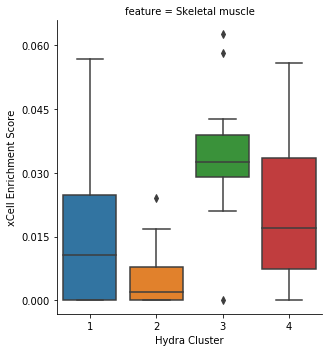

In [24]:
mask = (data['source'] == 'xCell') & (data['feature'].isin(sigs['xCell']))

t = data[mask]

g = sns.catplot(x='cluster', 
                y='value', 
                col='feature',
                kind='box',
                col_wrap=3,
                sharex=False,
                sharey=False,
                data=t)

for i in range(len(g.axes)):
    g.axes[i].set_xlabel('Hydra Cluster')
    g.axes[i].set_ylabel('xCell Enrichment Score')
    
plt.subplots_adjust(hspace=0.3, wspace=0.4)